###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2024.*

##Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 17.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [2]:
import pandas as pd

prices = pd.read_csv('prices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()


,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,228.403641,45.796803,32.461216,45.781605,21.425070,58.594608,77.260376,94.483681,43.373131,43.356884,...,45.167751,67.512207,92.559242,46.240116,95.842651,58.963661,121.330002,14.56,8.201962,78.800003
2019-01-03,222.953278,45.495949,31.952288,45.521481,20.943409,55.637482,75.691597,92.437935,43.123962,43.348557,...,43.886906,67.775871,92.600182,46.240116,95.877365,58.992794,122.430000,14.75,8.261633,79.599998
2019-01-04,230.421265,46.874874,32.961674,47.064281,21.639147,58.103325,77.949570,95.497078,44.043327,43.990444,...,45.612503,67.571701,92.542915,46.197544,95.903488,59.982925,121.440002,14.73,8.380974,81.440002
2019-01-07,232.238052,47.100510,33.029510,47.180885,21.665901,58.622952,78.248802,97.656494,43.983185,43.690346,...,45.772594,67.469627,92.551117,46.086876,95.903488,60.565334,121.860001,14.67,8.446068,82.320000
2019-01-08,234.420044,47.434795,33.216133,47.405128,21.683739,59.114239,78.856377,98.736206,44.387012,44.232204,...,46.252922,67.384583,92.755562,46.052830,95.894760,60.958515,121.529999,14.69,8.516588,84.000000


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


C:\Users\dario\AppData\Local\Temp\ipykernel_7324\4089816514.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(annualized_volatility[i], annualized_returns[i], prices.columns[i])


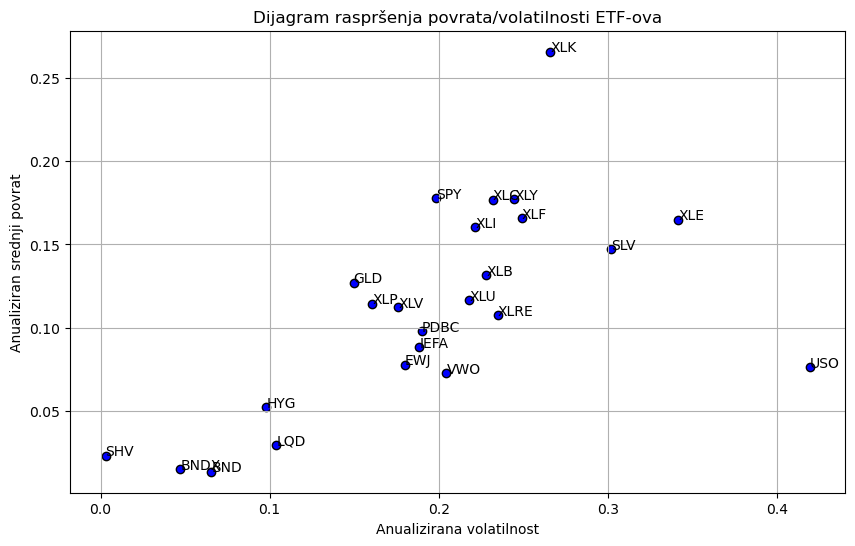

In [3]:
import numpy as np
import matplotlib.pyplot as plt

daily_returns = prices.pct_change().dropna()

mean_returns = daily_returns.mean()
volatility = daily_returns.std()

annualized_returns = mean_returns * 252
annualized_volatility = volatility * np.sqrt(252)


plt.figure(figsize=(10, 6))
plt.scatter(annualized_volatility, annualized_returns, c='blue', edgecolors='k')
plt.title('Dijagram raspršenja povrata/volatilnosti ETF-ova')
plt.xlabel('Anualizirana volatilnost')
plt.ylabel('Anualiziran srednji povrat')

for i in range(len(prices.columns)):
    plt.text(annualized_volatility[i], annualized_returns[i], prices.columns[i])

plt.grid(True)
plt.show()



ETF je bolji što je bliže gornjem lijevom kutu grafa, u našem slučaju dobre investicije bi bili ETF-ovi SHV, SPY, GLD, itd.. Loše investicije su ETF-ovi koji su blizu donjem desnom kutu grafa, u našem slučaju to su ETF-ovi USO, SLV, XLE...

1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

In [4]:
cov_matrix = daily_returns.cov()

correlation_matrix = daily_returns.corr()

print("Matrica kovarijance (Σ):\n", cov_matrix)
print("\nMatrica korelacije (C):\n", correlation_matrix)




Matrica kovarijance (Σ):
                SPY          IEFA           VWO           EWJ           XLF  \
SPY   1.563938e-04  1.284316e-04  1.209135e-04  1.065129e-04  1.664722e-04   
IEFA  1.284316e-04  1.409270e-04  1.268042e-04  1.167861e-04  1.490475e-04   
VWO   1.209135e-04  1.268042e-04  1.660366e-04  1.019196e-04  1.309846e-04   
EWJ   1.065129e-04  1.167861e-04  1.019196e-04  1.284446e-04  1.194511e-04   
XLF   1.664722e-04  1.490475e-04  1.309846e-04  1.194511e-04  2.462191e-04   
XLK   1.952644e-04  1.522063e-04  1.525210e-04  1.300298e-04  1.757941e-04   
XLV   1.141032e-04  9.261293e-05  8.311348e-05  7.377244e-05  1.215467e-04   
XLY   1.732646e-04  1.438595e-04  1.392397e-04  1.215446e-04  1.751697e-04   
XLP   9.456856e-05  7.711255e-05  6.476796e-05  6.138680e-05  1.049743e-04   
XLU   1.087107e-04  9.123672e-05  7.428304e-05  7.182514e-05  1.267513e-04   
XLI   1.543563e-04  1.360070e-04  1.200375e-04  1.100689e-04  1.959591e-04   
XLE   1.628126e-04  1.574396e-04  1.49

# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički (scree plot).**



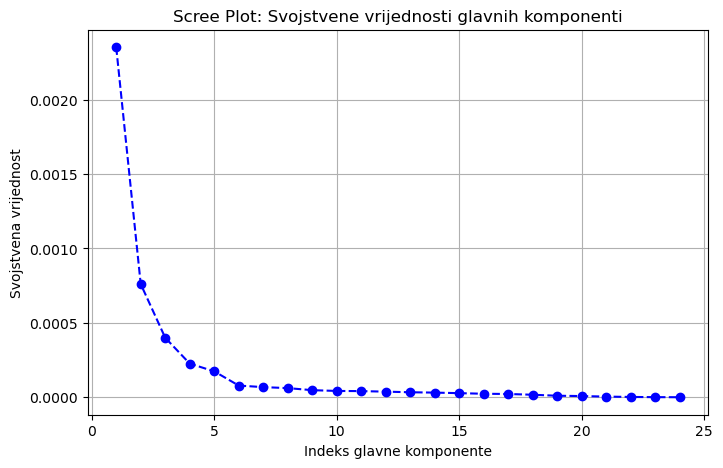

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.title('Scree Plot: Svojstvene vrijednosti glavnih komponenti')
plt.xlabel('Indeks glavne komponente')
plt.ylabel('Svojstvena vrijednost')
plt.grid(True)
plt.show()

2.2. **Izračunajte koliki udio ukupne varijance objašnjavaju prve tri komponente (kumulativno)?**

In [6]:
total_variance = np.sum(eigenvalues)
variance_first_three = np.sum(eigenvalues[:3])
cumulative_ratio = variance_first_three / total_variance
print(f"Prve tri komponente objašnjavaju {cumulative_ratio * 100:.2f}% ukupne varijance.")

Prve tri komponente objašnjavaju 78.65% ukupne varijance.


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

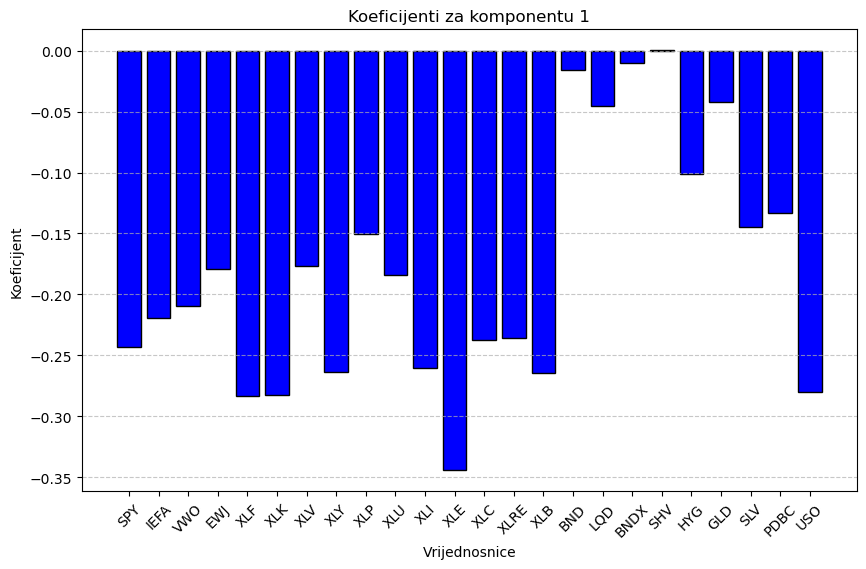

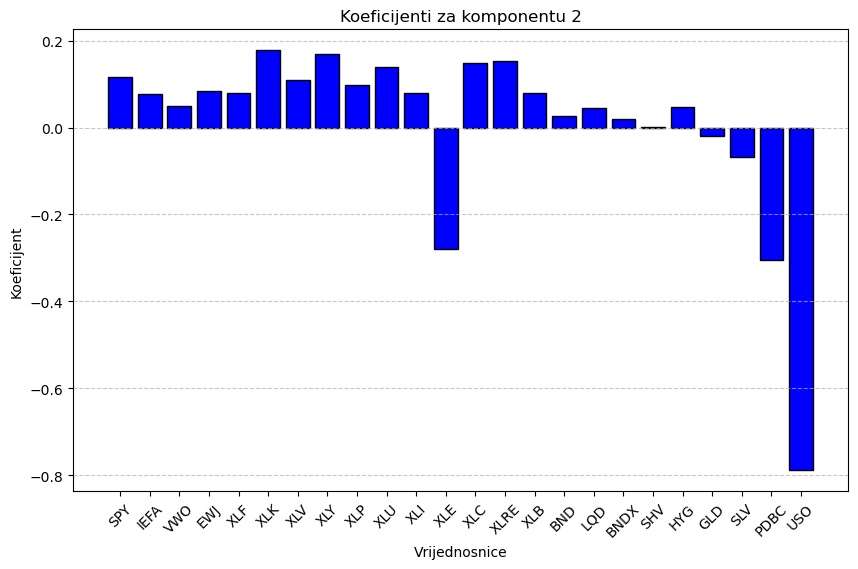

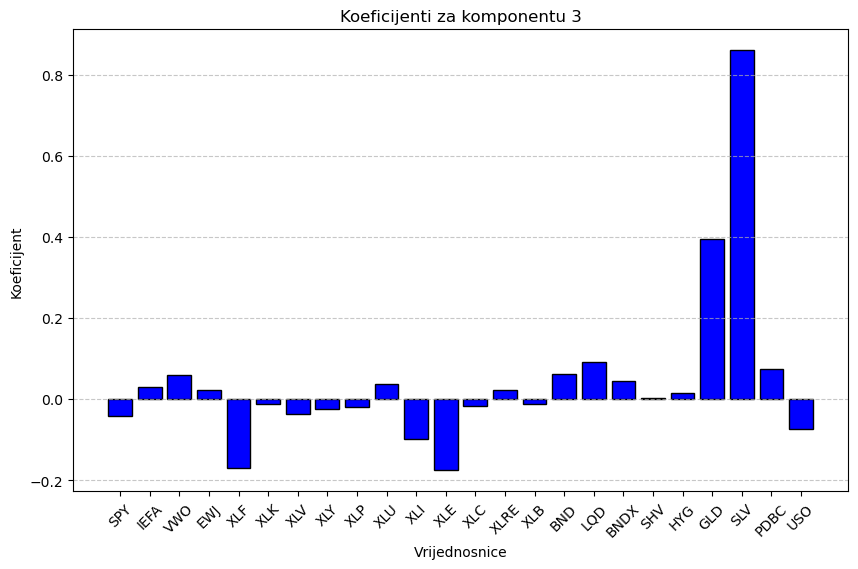

In [7]:
for i in range(3):
    plt.figure(figsize=(10, 6))
    plt.bar(prices.columns, eigenvectors[:, i], color='b', edgecolor='black')
    plt.title(f'Koeficijenti za komponentu {i + 1}')
    plt.xlabel('Vrijednosnice')
    plt.ylabel('Koeficijent')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

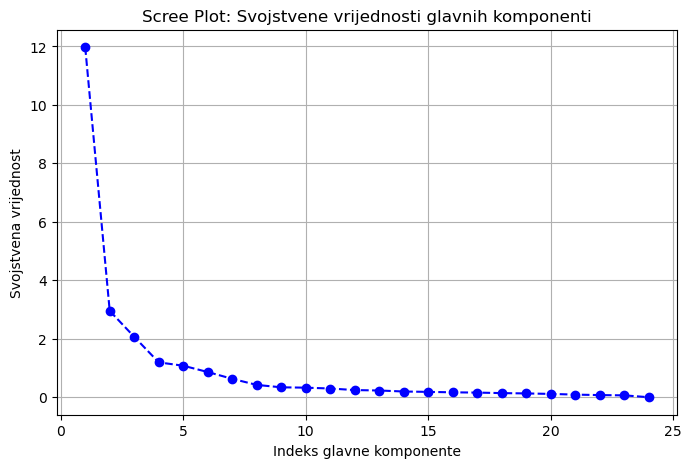

Prve tri komponente objašnjavaju 70.82% ukupne varijance.


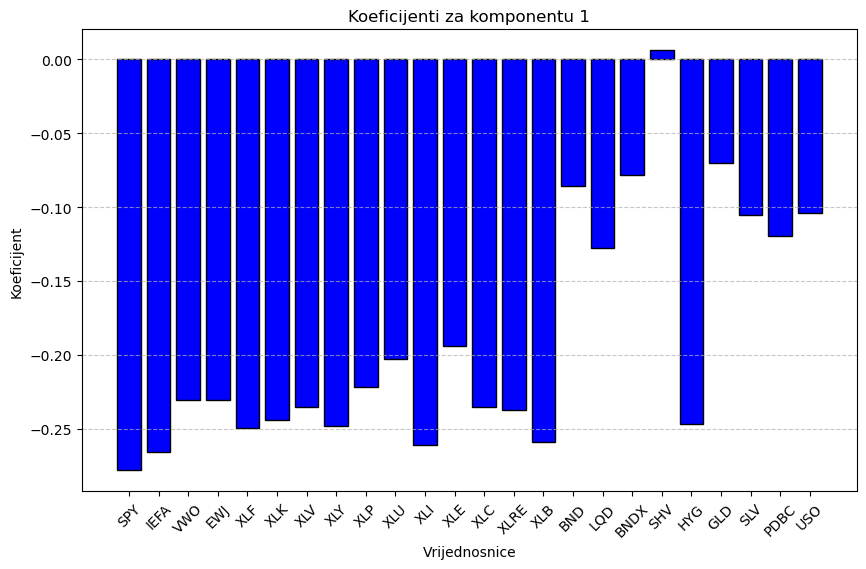

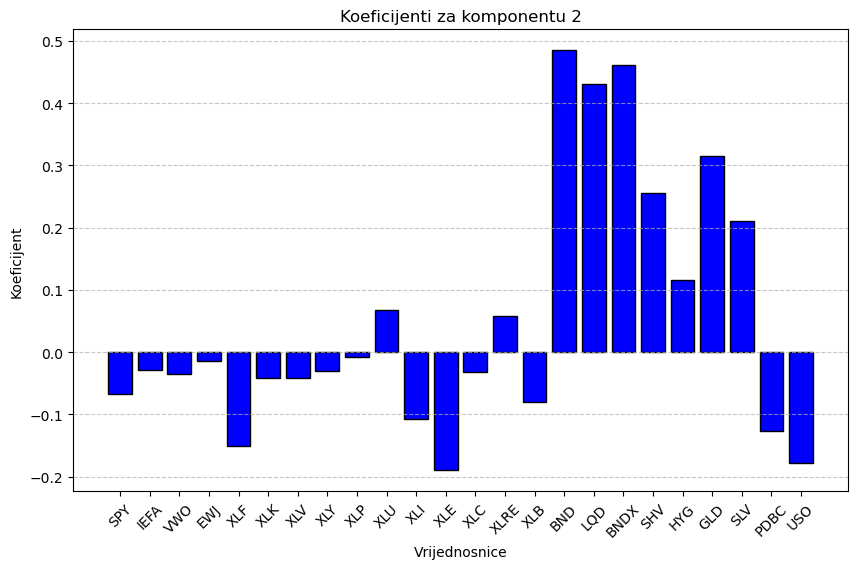

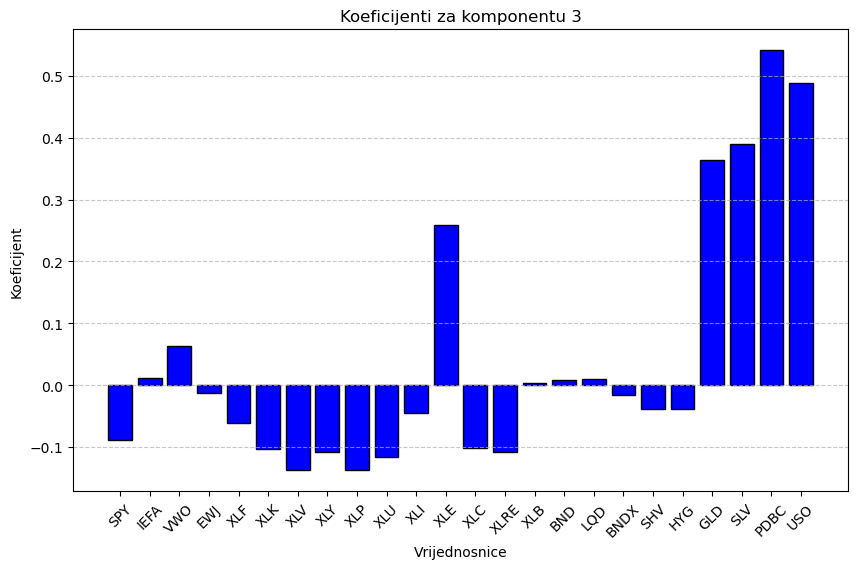

In [8]:
eigenvalues2, eigenvectors2 = np.linalg.eig(correlation_matrix)

sorted_indices2 = np.argsort(eigenvalues2)[::-1]  # Indeksi sortiranja u opadajućem redoslijedu
eigenvalues2 = eigenvalues2[sorted_indices2]
eigenvectors2 = eigenvectors2[:, sorted_indices2]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues2) + 1), eigenvalues2, marker='o', linestyle='--', color='b')
plt.title('Scree Plot: Svojstvene vrijednosti glavnih komponenti')
plt.xlabel('Indeks glavne komponente')
plt.ylabel('Svojstvena vrijednost')
plt.grid(True)
plt.show()

total_variance2 = np.sum(eigenvalues2)
variance_first_three2 = np.sum(eigenvalues2[:3])
cumulative_ratio2 = variance_first_three2 / total_variance2
print(f"Prve tri komponente objašnjavaju {cumulative_ratio2 * 100:.2f}% ukupne varijance.")

for i in range(3):
    plt.figure(figsize=(10, 6))
    plt.bar(prices.columns, eigenvectors2[:, i], color='b', edgecolor='black')
    plt.title(f'Koeficijenti za komponentu {i + 1}')
    plt.xlabel('Vrijednosnice')
    plt.ylabel('Koeficijent')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, potrebno je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte adekvatno skalirane i rotirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za sve portfelje, npr. 100).**



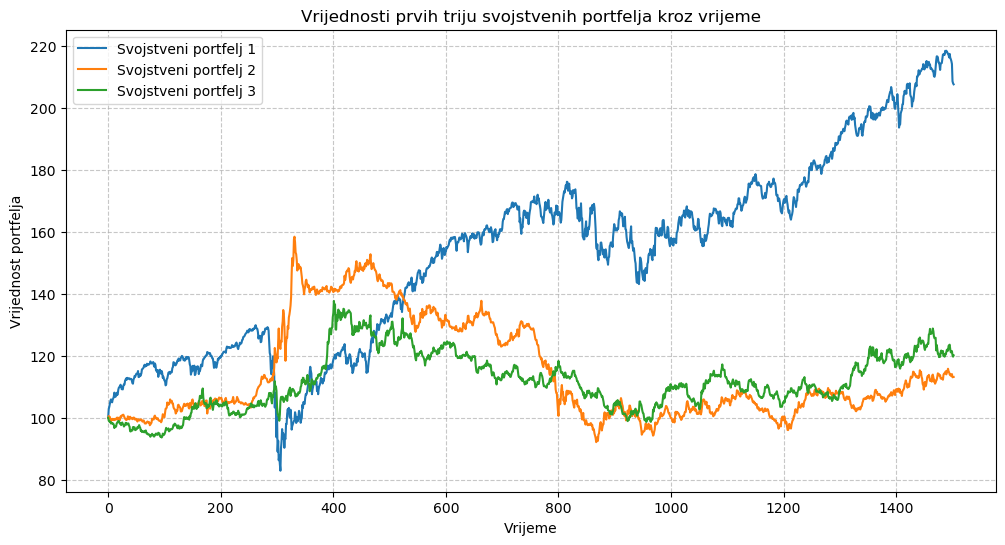

In [9]:
scaled_portfolios = []
for i in range(3): 
    eigenvector = eigenvectors[:, i]
    if np.sum(eigenvector) < 0:
        eigenvector *= -1
    scaled_portfolio = eigenvector / np.sum(np.abs(eigenvector))
    scaled_portfolios.append(scaled_portfolio)

scaled_portfolios = np.array(scaled_portfolios)

portfolio_returns = daily_returns.values @ scaled_portfolios.T

initial_price = 100
portfolio_prices = np.zeros_like(portfolio_returns)
portfolio_prices[0, :] = initial_price
for t in range(1, portfolio_returns.shape[0]):
    portfolio_prices[t, :] = portfolio_prices[t - 1, :] * (1 + portfolio_returns[t, :])

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(portfolio_prices[:, i], label=f'Svojstveni portfelj {i + 1}')
plt.title('Vrijednosti prvih triju svojstvenih portfelja kroz vrijeme')
plt.xlabel('Vrijeme')
plt.ylabel('Vrijednost portfelja')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?

**Izračunajte korelacijske koeficijente između povrata tri razmatrana svojstvena portfelja (realizacije prve tri glavne komponente) i svih pojedinih ETF-ova - za svaki od tri svojstvena portfelja pronađite ETF koji mu je najsličniji (najviši iznos korelacije povrata).**

In [10]:
portfolio_returns_df = pd.DataFrame(portfolio_returns, 
                                    columns=[f'Svojstveni portfelj {i+1}' for i in range(portfolio_returns.shape[1])],
                                    index=daily_returns.index)

correlation_matrix = daily_returns.corrwith(portfolio_returns_df)

most_similar_etfs = {}

for portfelj in portfolio_returns_df.columns:
    correlations = {}
    for etf in daily_returns.columns:
        corr = np.corrcoef(portfolio_returns_df[portfelj], daily_returns[etf])[0, 1]
        correlations[etf] = corr
    
    max_etf = max(correlations, key=correlations.get)
    most_similar_etfs[portfelj] = (max_etf, correlations[max_etf])

print("ETF s najvećom korelacijom za svaki svojstveni portfelj:")
for portfelj, (etf, corr) in most_similar_etfs.items():
    print(f"{portfelj}: {etf} (Korelacija: {corr:.2f})")


ETF s najvećom korelacijom za svaki svojstveni portfelj:
Svojstveni portfelj 1: SPY (Korelacija: 0.94)
Svojstveni portfelj 2: XLY (Korelacija: 0.30)
Svojstveni portfelj 3: SLV (Korelacija: 0.90)
